1. Importing the application data

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
sns.set_style("whitegrid")

In [178]:
application_master_df = pd.read_csv("application_data.csv")

application_master_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application_master_df.shape

(307511, 122)

2. Percentage of missing values for the columns

In [4]:
round(100 * (application_master_df.isnull().sum()/len(application_master_df.index)),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OWN_CAR_AGE                   65.99
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                  

3. Removing columns with higher missing percentage (more than 50%)

In [5]:
application_master_df = application_master_df[application_master_df.columns[application_master_df.isnull().mean() < 0.5]]
application_master_df.shape

(307511, 81)

4. Approach to impute columns with less missing value percentage

In [6]:
less_missing_df = application_master_df[application_master_df.columns[application_master_df.isnull().mean() < 0.13] & application_master_df.columns[application_master_df.isnull().mean() > 0]]
round(100 * (less_missing_df.isnull().sum()/len(less_missing_df.index)),2)

AMT_ANNUITY                 0.00
AMT_GOODS_PRICE             0.09
NAME_TYPE_SUITE             0.42
CNT_FAM_MEMBERS             0.00
EXT_SOURCE_2                0.21
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
DAYS_LAST_PHONE_CHANGE      0.00
dtype: float64

4. Approach to impute columns with less missing value percentage

a. For numerical columns like, AMT_ANNUITY, AMT_GOOD_PRICE the missing values can be imputed with median so that it does not get impacted with the exceptionallyu higher values or outlines.

b. NAME_TYPE_SUITE is categorical value, and as per the understanding of the column it can be imputed as 'Not avaliable' or 'Unaccompanied' as the most frequent one.

c. The observation variables can be imputed with 0, as it can indicate that there was no such observation made for the given application.


5. Narrowing down to understandable columns and to perform feasible analysis

In [7]:
application_filtered_df = application_master_df.loc[:,['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','CODE_GENDER','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']]
application_filtered_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,DAYS_EMPLOYED,CODE_GENDER,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,100002,1,Cash loans,N,Y,202500.0,406597.5,24700.5,351000.0,Working,...,-637,M,Laborers,1.0,0,0,0,0,0,0
1,100003,0,Cash loans,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,...,-1188,F,Core staff,2.0,0,0,0,0,0,0
2,100004,0,Revolving loans,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,...,-225,M,Laborers,1.0,0,0,0,0,0,0
3,100006,0,Cash loans,N,Y,135000.0,312682.5,29686.5,297000.0,Working,...,-3039,F,Laborers,2.0,0,0,0,0,0,0
4,100007,0,Cash loans,N,Y,121500.0,513000.0,21865.5,513000.0,Working,...,-3038,M,Core staff,1.0,0,0,0,0,1,1


In [8]:
#Finding the percentage of null values
round(100 * (application_filtered_df.isnull().sum()/len(application_filtered_df.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
CODE_GENDER                     0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
dtype: float64

The column OCCUPATION_TYPE has high missing values, so imputing it with 'Not Mentioned'

In [9]:
application_filtered_df['OCCUPATION_TYPE'].fillna('Not Mentioned',inplace = True)
application_filtered_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,DAYS_EMPLOYED,CODE_GENDER,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,100002,1,Cash loans,N,Y,202500.0,406597.5,24700.5,351000.0,Working,...,-637,M,Laborers,1.0,0,0,0,0,0,0
1,100003,0,Cash loans,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,...,-1188,F,Core staff,2.0,0,0,0,0,0,0
2,100004,0,Revolving loans,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,...,-225,M,Laborers,1.0,0,0,0,0,0,0
3,100006,0,Cash loans,N,Y,135000.0,312682.5,29686.5,297000.0,Working,...,-3039,F,Laborers,2.0,0,0,0,0,0,0
4,100007,0,Cash loans,N,Y,121500.0,513000.0,21865.5,513000.0,Working,...,-3038,M,Core staff,1.0,0,0,0,0,1,1


In [10]:
#Finding the percentage of null values
round(100 * (application_filtered_df.isnull().sum()/len(application_filtered_df.index)),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
CODE_GENDER                    0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REG_REGION_NOT_LIVE_REGION     0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION    0.00
REG_CITY_NOT_LIVE_CITY         0.00
REG_CITY_NOT_WORK_CITY         0.00
LIVE_CITY_NOT_WORK_CITY        0.00
dtype: float64

6. Removing rows which has more than 50% missing data, if any.

In [11]:
application_filtered_df.shape

(307511, 24)

In [12]:
application_filtered_df = application_filtered_df.dropna(thresh=12)
application_filtered_df.shape

(307511, 24)

7. Checking on datatypes and alternation if required

In [13]:
application_filtered_df.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
CODE_GENDER                     object
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
dtype: object

8. Fixing and deriving columns related to age and work experience

In [14]:
application_filtered_df['DAYS_BIRTH'] = application_filtered_df['DAYS_BIRTH'].astype(str).str.strip('-')
application_filtered_df['DAYS_BIRTH'] = application_filtered_df['DAYS_BIRTH'].apply(pd.to_numeric) 
application_filtered_df['DAYS_EMPLOYED'] = application_filtered_df['DAYS_EMPLOYED'].astype(str).str.strip('-')
application_filtered_df['DAYS_EMPLOYED'] = application_filtered_df['DAYS_EMPLOYED'].apply(pd.to_numeric)
application_filtered_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,DAYS_EMPLOYED,CODE_GENDER,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,100002,1,Cash loans,N,Y,202500.0,406597.5,24700.5,351000.0,Working,...,637,M,Laborers,1.0,0,0,0,0,0,0
1,100003,0,Cash loans,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,...,1188,F,Core staff,2.0,0,0,0,0,0,0
2,100004,0,Revolving loans,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,...,225,M,Laborers,1.0,0,0,0,0,0,0
3,100006,0,Cash loans,N,Y,135000.0,312682.5,29686.5,297000.0,Working,...,3039,F,Laborers,2.0,0,0,0,0,0,0
4,100007,0,Cash loans,N,Y,121500.0,513000.0,21865.5,513000.0,Working,...,3038,M,Core staff,1.0,0,0,0,0,1,1
5,100008,0,Cash loans,N,Y,99000.0,490495.5,27517.5,454500.0,State servant,...,1588,M,Laborers,2.0,0,0,0,0,0,0
6,100009,0,Cash loans,Y,Y,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,...,3130,F,Accountants,3.0,0,0,0,0,0,0
7,100010,0,Cash loans,Y,Y,360000.0,1530000.0,42075.0,1530000.0,State servant,...,449,M,Managers,2.0,0,0,0,0,1,1
8,100011,0,Cash loans,N,Y,112500.0,1019610.0,33826.5,913500.0,Pensioner,...,365243,F,Not Mentioned,2.0,0,0,0,0,0,0
9,100012,0,Revolving loans,N,Y,135000.0,405000.0,20250.0,405000.0,Working,...,2019,M,Laborers,1.0,0,0,0,0,0,0


Deriving column to define applicant's age and work experience

In [15]:
application_filtered_df['AGE'] = round(application_filtered_df['DAYS_BIRTH']/365,1)
application_filtered_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,CODE_GENDER,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE
0,100002,1,Cash loans,N,Y,202500.0,406597.5,24700.5,351000.0,Working,...,M,Laborers,1.0,0,0,0,0,0,0,25.9
1,100003,0,Cash loans,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,...,F,Core staff,2.0,0,0,0,0,0,0,45.9
2,100004,0,Revolving loans,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,...,M,Laborers,1.0,0,0,0,0,0,0,52.2
3,100006,0,Cash loans,N,Y,135000.0,312682.5,29686.5,297000.0,Working,...,F,Laborers,2.0,0,0,0,0,0,0,52.1
4,100007,0,Cash loans,N,Y,121500.0,513000.0,21865.5,513000.0,Working,...,M,Core staff,1.0,0,0,0,0,1,1,54.6
5,100008,0,Cash loans,N,Y,99000.0,490495.5,27517.5,454500.0,State servant,...,M,Laborers,2.0,0,0,0,0,0,0,46.4
6,100009,0,Cash loans,Y,Y,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,...,F,Accountants,3.0,0,0,0,0,0,0,37.7
7,100010,0,Cash loans,Y,Y,360000.0,1530000.0,42075.0,1530000.0,State servant,...,M,Managers,2.0,0,0,0,0,1,1,51.6
8,100011,0,Cash loans,N,Y,112500.0,1019610.0,33826.5,913500.0,Pensioner,...,F,Not Mentioned,2.0,0,0,0,0,0,0,55.1
9,100012,0,Revolving loans,N,Y,135000.0,405000.0,20250.0,405000.0,Working,...,M,Laborers,1.0,0,0,0,0,0,0,39.6


In [16]:
application_filtered_df['EXP_IN_YEARS'] = round(application_filtered_df['DAYS_EMPLOYED']/365,1)
application_filtered_df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE,EXP_IN_YEARS
0,100002,1,Cash loans,N,Y,202500.0,406597.5,24700.5,351000.0,Working,...,Laborers,1.0,0,0,0,0,0,0,25.9,1.7
1,100003,0,Cash loans,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,...,Core staff,2.0,0,0,0,0,0,0,45.9,3.3
2,100004,0,Revolving loans,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,...,Laborers,1.0,0,0,0,0,0,0,52.2,0.6
3,100006,0,Cash loans,N,Y,135000.0,312682.5,29686.5,297000.0,Working,...,Laborers,2.0,0,0,0,0,0,0,52.1,8.3
4,100007,0,Cash loans,N,Y,121500.0,513000.0,21865.5,513000.0,Working,...,Core staff,1.0,0,0,0,0,1,1,54.6,8.3
5,100008,0,Cash loans,N,Y,99000.0,490495.5,27517.5,454500.0,State servant,...,Laborers,2.0,0,0,0,0,0,0,46.4,4.4
6,100009,0,Cash loans,Y,Y,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,...,Accountants,3.0,0,0,0,0,0,0,37.7,8.6
7,100010,0,Cash loans,Y,Y,360000.0,1530000.0,42075.0,1530000.0,State servant,...,Managers,2.0,0,0,0,0,1,1,51.6,1.2
8,100011,0,Cash loans,N,Y,112500.0,1019610.0,33826.5,913500.0,Pensioner,...,Not Mentioned,2.0,0,0,0,0,0,0,55.1,1000.7
9,100012,0,Revolving loans,N,Y,135000.0,405000.0,20250.0,405000.0,Working,...,Laborers,1.0,0,0,0,0,0,0,39.6,5.5


9. Plotting and treating outliers for some numeric columns and making more meaningful range for these.

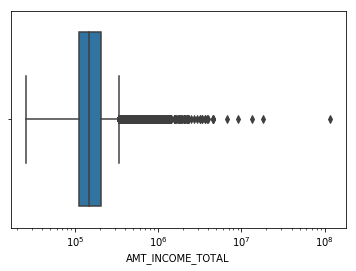

In [19]:
sns.boxplot(x='AMT_INCOME_TOTAL', data=application_filtered_df)
plt.xscale('log')
plt.show()

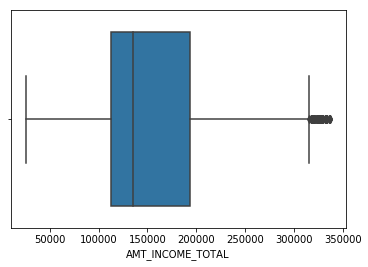

In [20]:
application_filtered_df = application_filtered_df[application_filtered_df['AMT_INCOME_TOTAL'] < application_filtered_df['AMT_INCOME_TOTAL'].quantile(.95)]
sns.boxplot(x='AMT_INCOME_TOTAL', data=application_filtered_df)
plt.show()

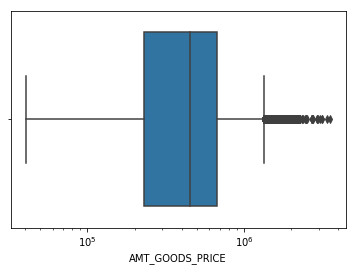

In [21]:
sns.boxplot(x='AMT_GOODS_PRICE', data=application_filtered_df)
plt.xscale('log')
plt.show()

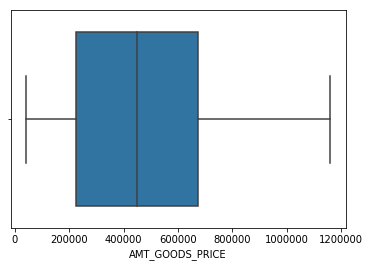

In [22]:
application_filtered_df = application_filtered_df[application_filtered_df['AMT_GOODS_PRICE'] < application_filtered_df['AMT_GOODS_PRICE'].quantile(.95)]
sns.boxplot(x='AMT_GOODS_PRICE', data=application_filtered_df)
plt.show()

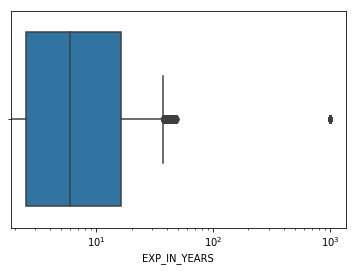

In [23]:
sns.boxplot(x='EXP_IN_YEARS', data=application_filtered_df)
plt.xscale('log')
plt.show()

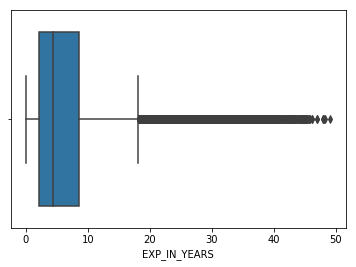

In [24]:
application_filtered_df = application_filtered_df[application_filtered_df['EXP_IN_YEARS'] < application_filtered_df['EXP_IN_YEARS'].quantile(.95)]
sns.boxplot(x='EXP_IN_YEARS', data=application_filtered_df)
plt.show()

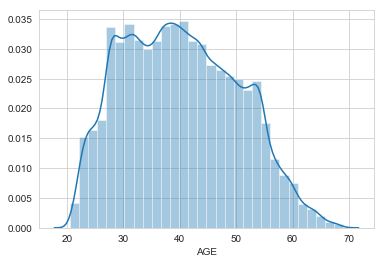

In [176]:
sns.distplot(application_filtered_df['AGE'], bins=30)
plt.show()

Note: Above plot shows that the number of applicants mainly lies between age of 30 to 45, mostly termed as early mid-age and mid-age category. Majority is in between 38 to 40 years range.

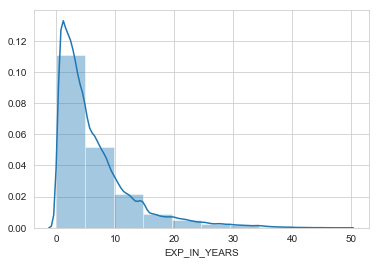

In [175]:
sns.distplot(application_filtered_df['EXP_IN_YEARS'], bins=10)
plt.show()

Note: Above plot shows that the number of applicants are mainly in less than 10 years of experience , mostly early in career.

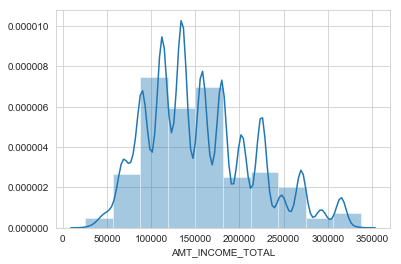

In [177]:
sns.distplot(application_filtered_df['AMT_INCOME_TOTAL'], bins=10)
plt.show()

Note: Above plot shows that the salary of applicants mainly lies in 10 to 15 lakhs.

10. Creating dataframes for different TARGETs i.e. 0 and 1 from the filtered data set


In [25]:
target0_df = application_filtered_df.loc[application_filtered_df['TARGET'] == 0]
target0_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE,EXP_IN_YEARS
1,100003,0,Cash loans,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,...,Core staff,2.0,0,0,0,0,0,0,45.9,3.3
2,100004,0,Revolving loans,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,...,Laborers,1.0,0,0,0,0,0,0,52.2,0.6
3,100006,0,Cash loans,N,Y,135000.0,312682.5,29686.5,297000.0,Working,...,Laborers,2.0,0,0,0,0,0,0,52.1,8.3
4,100007,0,Cash loans,N,Y,121500.0,513000.0,21865.5,513000.0,Working,...,Core staff,1.0,0,0,0,0,1,1,54.6,8.3
5,100008,0,Cash loans,N,Y,99000.0,490495.5,27517.5,454500.0,State servant,...,Laborers,2.0,0,0,0,0,0,0,46.4,4.4


In [26]:
target1_df = application_filtered_df.loc[application_filtered_df['TARGET'] == 1]
target1_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE,EXP_IN_YEARS
0,100002,1,Cash loans,N,Y,202500.0,406597.5,24700.5,351000.0,Working,...,Laborers,1.0,0,0,0,0,0,0,25.9,1.7
26,100031,1,Cash loans,N,Y,112500.0,979992.0,27076.5,702000.0,Working,...,Cooking staff,1.0,0,0,0,0,0,0,51.3,7.2
40,100047,1,Cash loans,N,Y,202500.0,1193580.0,35028.0,855000.0,Commercial associate,...,Laborers,2.0,0,0,0,0,0,0,47.9,3.5
42,100049,1,Cash loans,N,N,135000.0,288873.0,16258.5,238500.0,Working,...,Sales staff,2.0,0,0,0,0,0,0,36.7,9.9
94,100112,1,Cash loans,Y,Y,315000.0,953460.0,64107.0,900000.0,Commercial associate,...,Not Mentioned,1.0,0,0,0,0,1,1,27.9,5.5


11. Data imbalance percentage for defaulter 

In [76]:
total_rows = application_filtered_df.shape[0]
defaulter_count = target1_df.shape[0]
100*(defaulter_count/total_rows)

9.053009595683498

12. Performing univarate analysis on different columns for defaulters(Target=1) and non-defaulters(Target=0)

a. CODE_GENDER

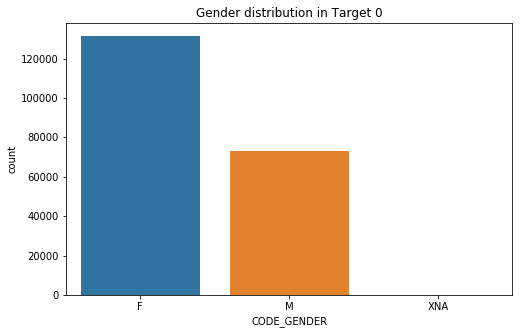

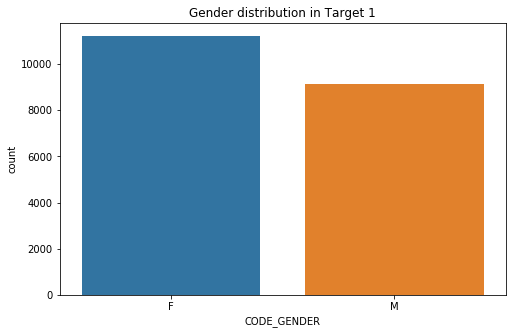

In [85]:
plt.figure(figsize=(8,5))
sns.countplot(x="CODE_GENDER", data=target0_df, order=target0_df['CODE_GENDER'].value_counts().index)
plt.title('Gender distribution in Target 0')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="CODE_GENDER", data=target1_df, order=target1_df['CODE_GENDER'].value_counts().index)
plt.title('Gender distribution in Target 1')
plt.show()

Note: The number of female applicatnts and defaulters is higher compared to male applicants. 

b. NAME_INCOME_TYPE

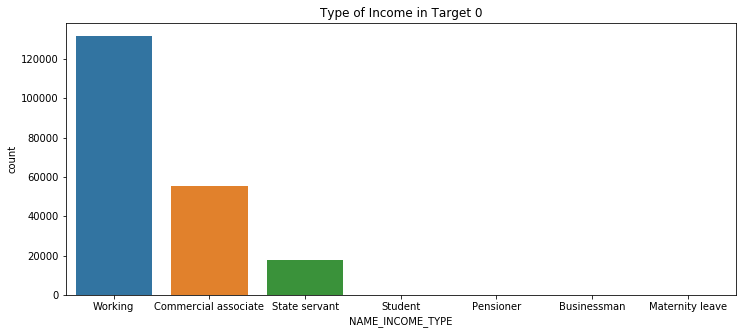

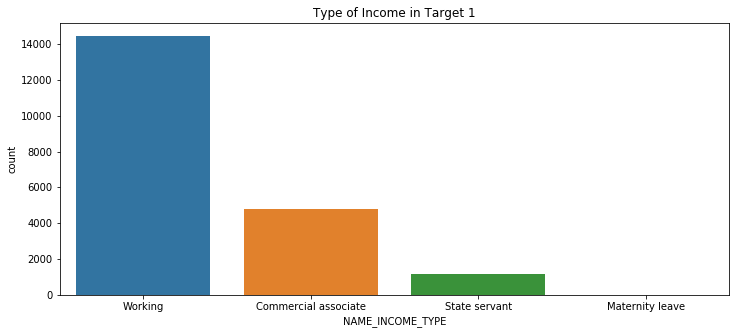

In [90]:
plt.figure(figsize=(12,5))
sns.countplot(x="NAME_INCOME_TYPE", data=target0_df, order=target0_df['NAME_INCOME_TYPE'].value_counts().index)
plt.title('Type of Income in Target 0')
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(x="NAME_INCOME_TYPE", data=target1_df, order=target1_df['NAME_INCOME_TYPE'].value_counts().index)
plt.title('Type of Income in Target 1')
plt.show()

Note: Univariate Analysis for 'NAME_INCOME_TYPE' across Target1 and Target0 shows the 'Working' type have more number in both the cases, considering that the 'Working' applicants are more. It also shows that a major chunk is divided among 'Working','State Servant','Commercial associate' leaving the other NAME_INCOME_TYPE to negligibe and also shows that 'State Servant' has less payment difficulties.

c. OCCUPATION_TYPE

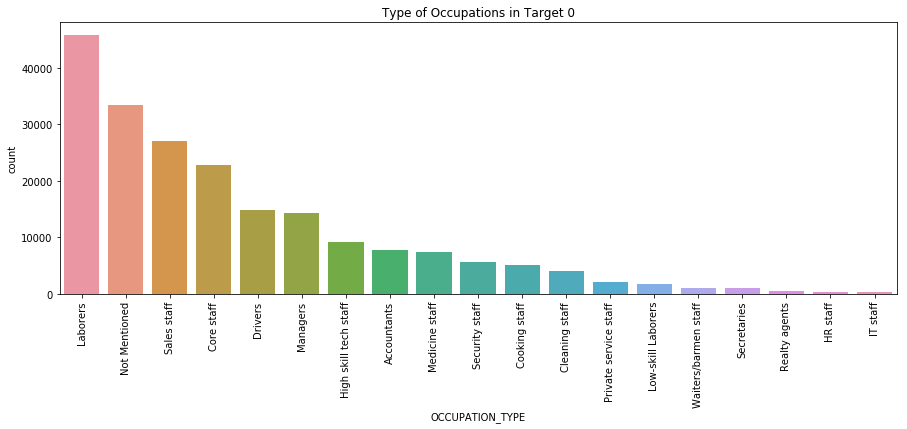

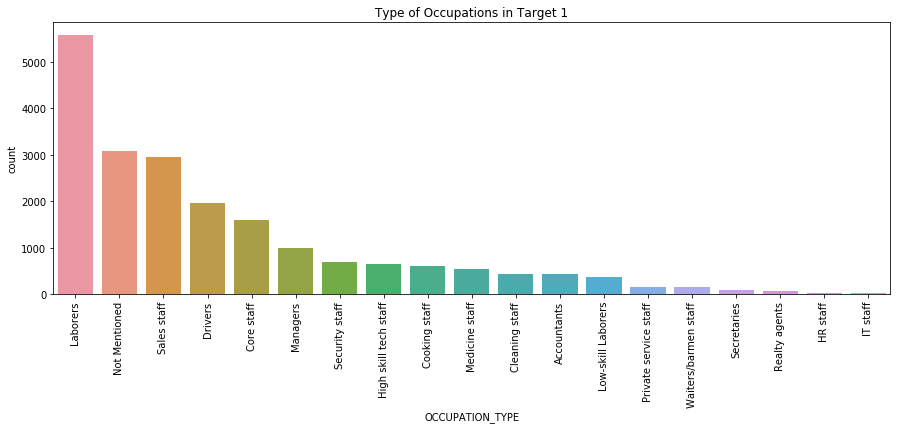

In [92]:
plt.figure(figsize=(15,5))
sns.countplot(x="OCCUPATION_TYPE", data=target0_df, order=target0_df['OCCUPATION_TYPE'].value_counts().index)
plt.title('Type of Occupations in Target 0')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,5))
sns.countplot(x="OCCUPATION_TYPE", data=target1_df, order=target1_df['OCCUPATION_TYPE'].value_counts().index)
plt.title('Type of Occupations in Target 1')
plt.xticks(rotation=90)
plt.show()

Note: Laborers are the heightest in loan application as well as defaulter category. A major applications do not have the occupation details mentioned. Drivers are more prone to be defualters as well.

d. NAME_EDUCATION_TYPE


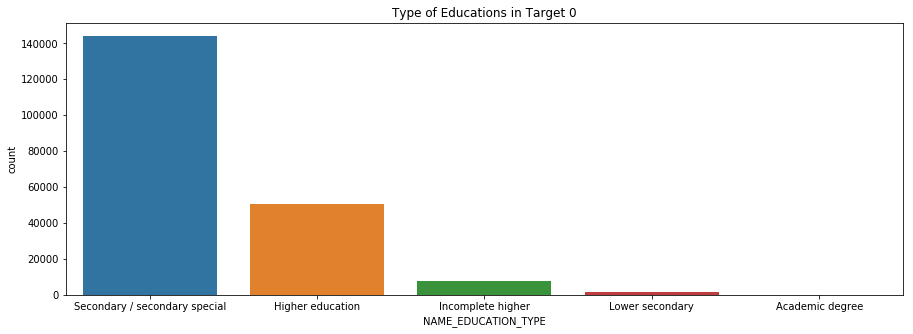

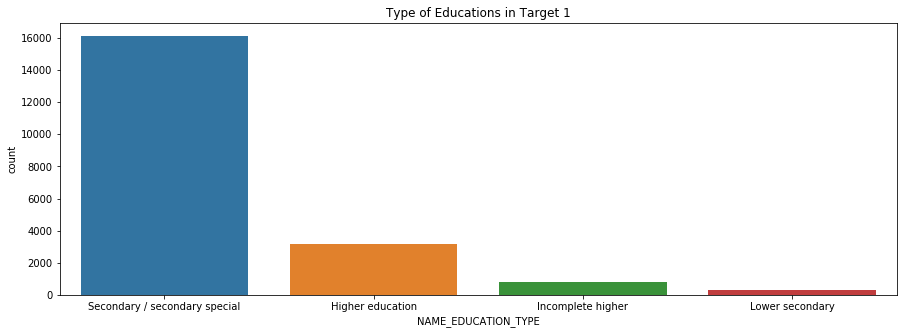

In [94]:
plt.figure(figsize=(15,5))
sns.countplot(x="NAME_EDUCATION_TYPE", data=target0_df,order=target0_df['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Type of Educations in Target 0')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot(x="NAME_EDUCATION_TYPE", data=target1_df,order=target1_df['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Type of Educations in Target 1')
plt.show()

Note: It clearly shows that secondary and secondary special category are more prone to apply for loans as well as being defaulters. The 'academic degree' has less number of applications, although with negligible defaulters.

e. NAME_FAMILY_STATUS

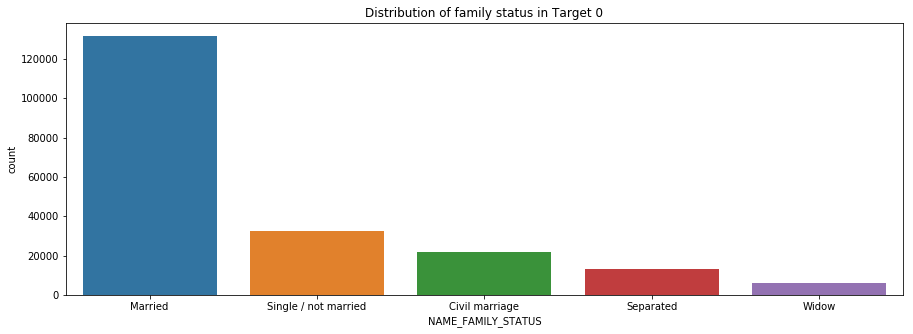

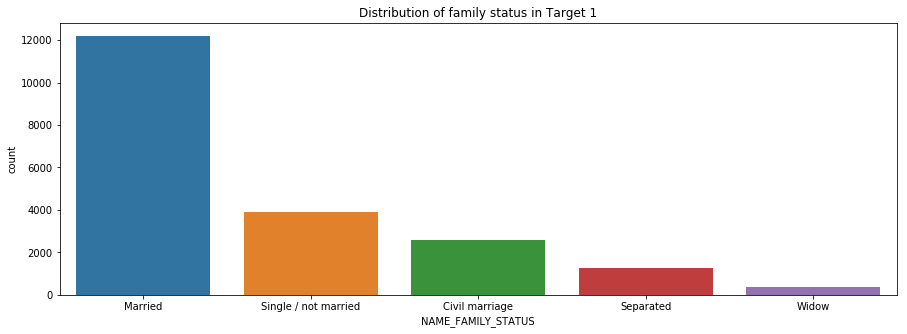

In [95]:
plt.figure(figsize=(15,5))
sns.countplot(x="NAME_FAMILY_STATUS", data=target0_df, order=target0_df['NAME_FAMILY_STATUS'].value_counts().index)
plt.title('Distribution of family status in Target 0')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot(x="NAME_FAMILY_STATUS", data=target1_df, order=target1_df['NAME_FAMILY_STATUS'].value_counts().index)
plt.title('Distribution of family status in Target 1')
plt.show()

Note: The family status pattern is almost same for defaulters and non-defaulters. Married people are more prone to apply loans in compare to other categories, followed by single category.

13. Performing bivariate analysis on different columns for defaulters(Target=1) and non-defaulters(Target=0)

a. AMT_CREDIT and AMT_GOODS_PRICE

Intention: AMT_CREDIT, AMT_GOODS_PRICE should be aligned to avail the loan. The Loan approved and credited amount should not be beyond range of the good price. The target1 data will help to identify those range where it should not be a defaulter if these two aligned and needs to be checked deeply. For target0, we need to check the range where this two are beyond the range and should be trated as defaulter.

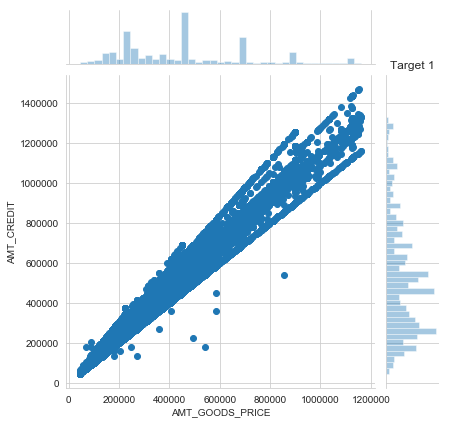

In [143]:
sns.jointplot('AMT_GOODS_PRICE', 'AMT_CREDIT', target1_df)
plt.title('Target 1')
plt.show()

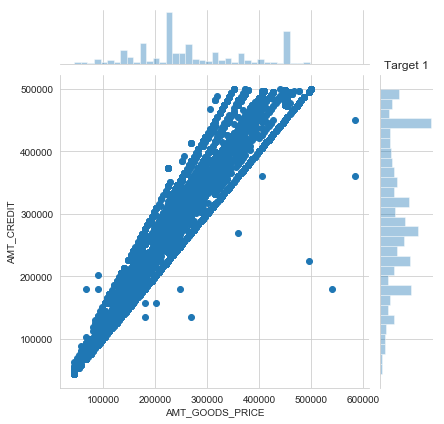

In [144]:
sns.jointplot('AMT_GOODS_PRICE', 'AMT_CREDIT', target1_df[target1_df['AMT_CREDIT']<500000])
plt.title('Target 1')
plt.show()

Note: For target1, both the parameters are increasing exponentially, but we can see some of the outlined scatters where the good price is low, but the credit amount is high, and on the other hand, some case good price is high, but credit amount is low.

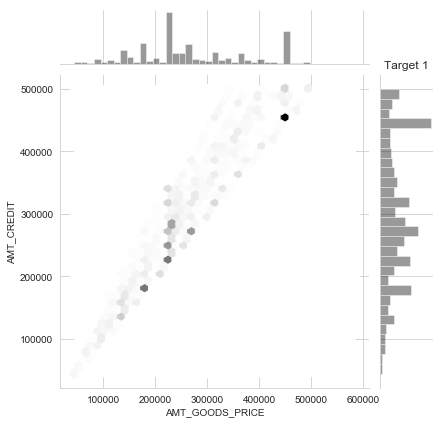

In [145]:
sns.jointplot('AMT_GOODS_PRICE', 'AMT_CREDIT', target1_df[target1_df['AMT_CREDIT']<500000], kind="hex", color="k")
plt.title('Target 1')
plt.show()

Note: In the above sample for Target=1, there is a dark dot between 400000 and 500000, it shows both the parameters are aligned, but still it is a defaulter, so we need to deep dive on other parameters to find out the actual reason, or it should be marked as non-defaulter or not.

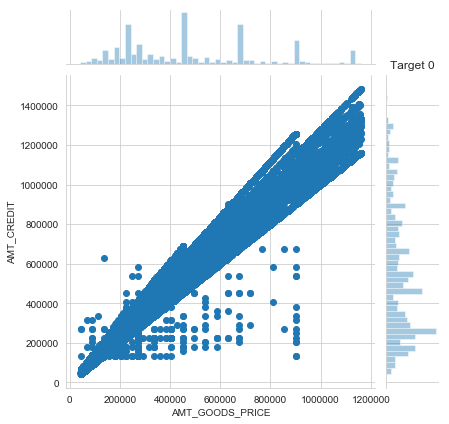

In [146]:
sns.jointplot('AMT_GOODS_PRICE','AMT_CREDIT', target0_df)
plt.title('Target 0')
plt.show()

Note: There are some data points where credited amount is more than the actual good price. This should be avoided and rechecked.

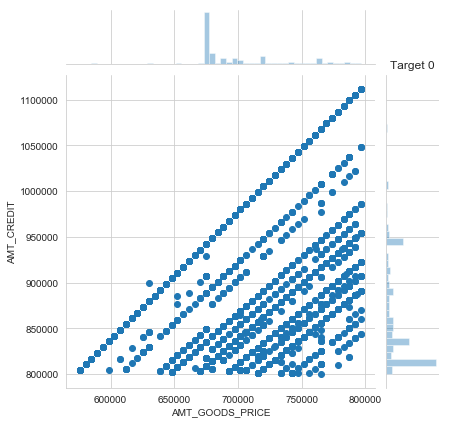

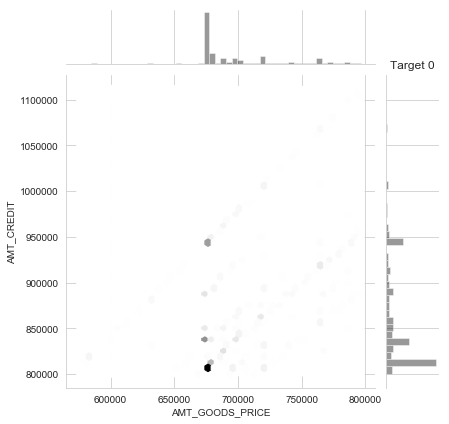

In [150]:
temp0_df = target0_df[target0_df['AMT_CREDIT']>800000]
temp0_df = temp0_df[temp0_df['AMT_GOODS_PRICE']<800000]
sns.jointplot('AMT_GOODS_PRICE', 'AMT_CREDIT', temp0_df)
plt.title('Target 0')
plt.show()

sns.jointplot('AMT_GOODS_PRICE', 'AMT_CREDIT', temp0_df, kind="hex", color="k")
plt.title('Target 0')
plt.show()

Note: For Target=0, here the point to note is, in the dark region the good price and the credit amount are not aligned and it is not under defaulter as well. So the credit amount is way more high than the actual required loan amount.

b. AMT_GOODS_PRICE and AMT_INCOME_TOTAL

Intention: For any loan application, there should be a defined range ratio for the applicant's income to the price of the good being availed for. If the price of the good's price is beyond range, it should be checked thoroughly. Similary, it is within defined range, it is more likely to approve to get the loan.

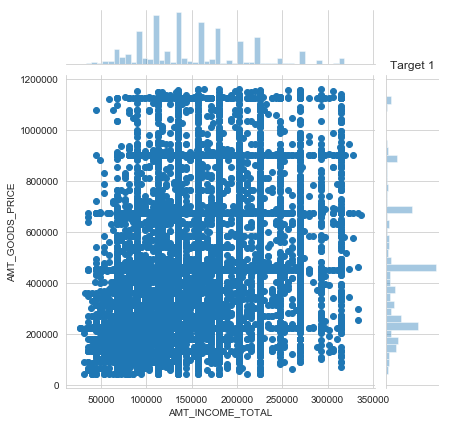

In [151]:
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', target1_df)
plt.title('Target 1')
plt.show()

Note: For the defaulter list, the more density is mainly where the good price is near to double of the total income.

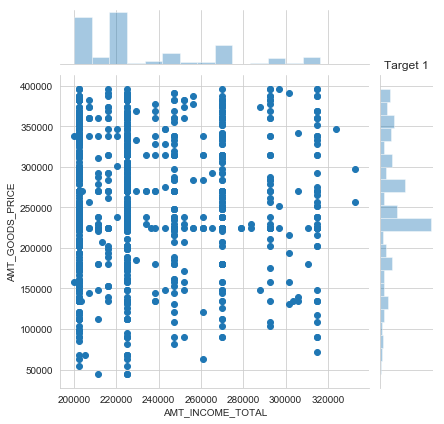

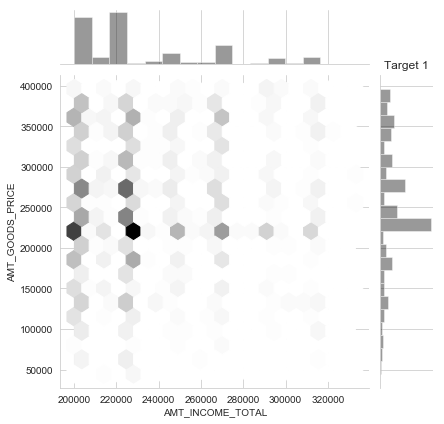

In [160]:
temp1_df = target1_df[target1_df['AMT_INCOME_TOTAL']>200000]
temp1_df = temp1_df[temp1_df['AMT_GOODS_PRICE']<400000]
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', temp1_df)
plt.title('Target 1')
plt.show()

sns.jointplot('AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', temp1_df, kind="hex", color="k")
plt.title('Target 1')
plt.show()

Note: For the above sample on Target=1, there is an intensity where the good's price is almost near to the income value and resulted to defaulter. We need to do more check on this why it has become the defaulter in this pattern.

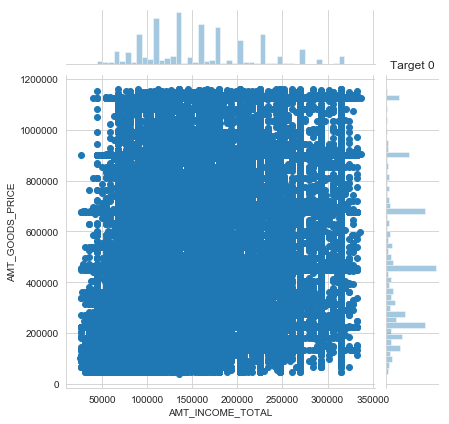

In [159]:
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', target0_df)
plt.title('Target 0')
plt.show()

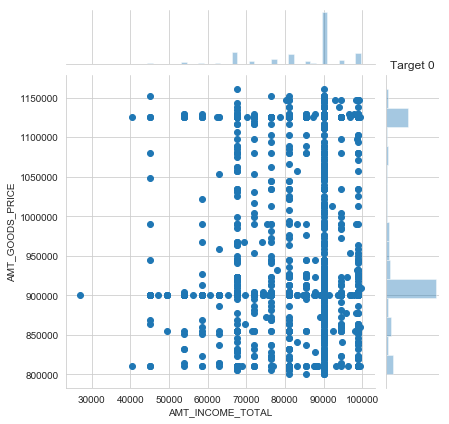

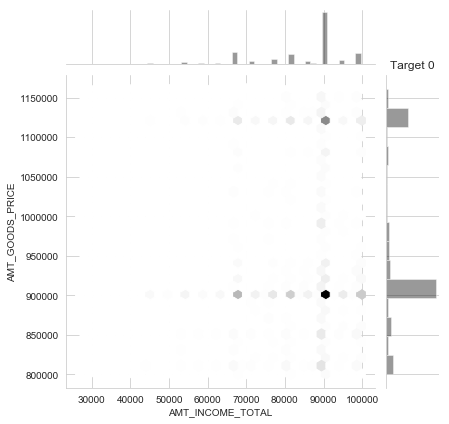

In [165]:
temp2_df = target0_df[target0_df['AMT_INCOME_TOTAL']<100000]
temp2_df = temp2_df[temp2_df['AMT_GOODS_PRICE']>800000]
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', temp2_df)
plt.title('Target 0')
plt.show()

sns.jointplot('AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', temp2_df, kind="hex", color="k")
plt.title('Target 0')
plt.show()

Note: From the above sample on Target=0, the dark point is where the good's price is almost 10 times of the income total and it is not under defaulter as well. We need to check more on these kind of transactions.

14. Finding correlations between both the defaulter and non-defaulter data

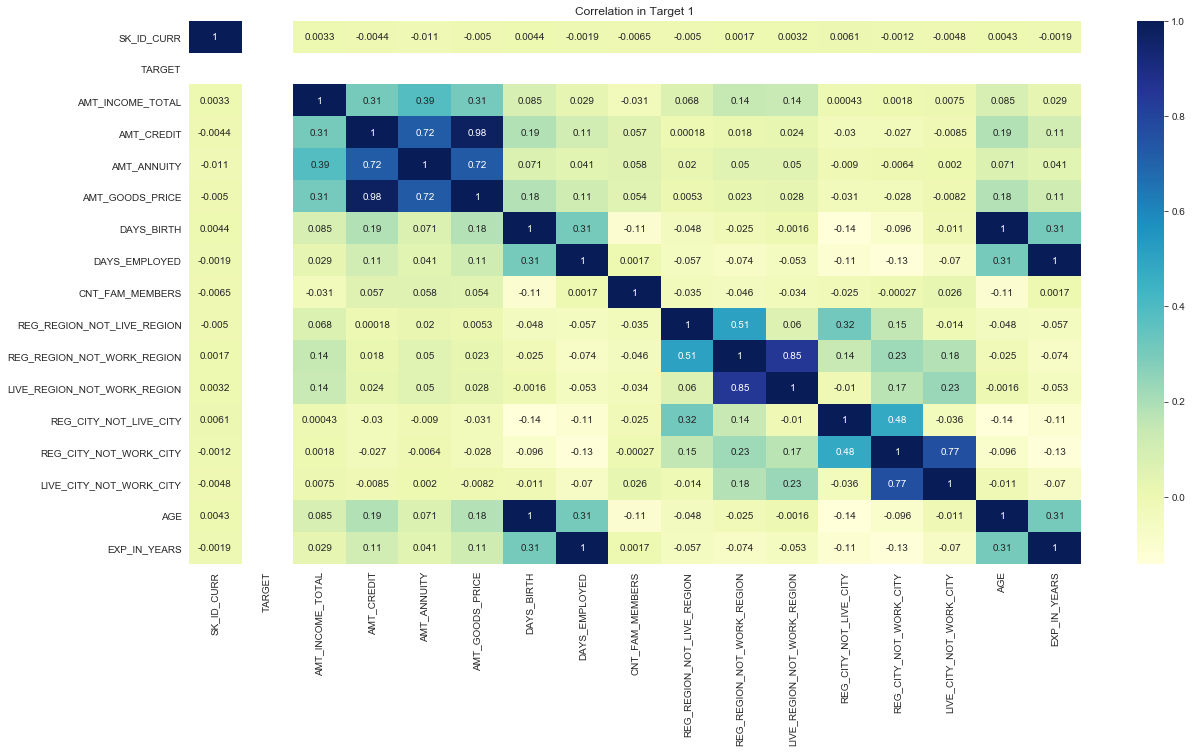

In [179]:
target1_corr = target1_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(target1_corr, cmap="YlGnBu", annot=True)
plt.title('Correlation in Target 1')
plt.show()

a. Top correlation in defaulter data:

1. AMT_GOOD_PRICE and AMT_CREDIT - 98%
2. LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION - 85%
3. LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY - 77%
4. AMT_ANNUITY and AMT_CREDIT, AMT_ANNUITY and AMT_GOOD_PRICE  - 72%

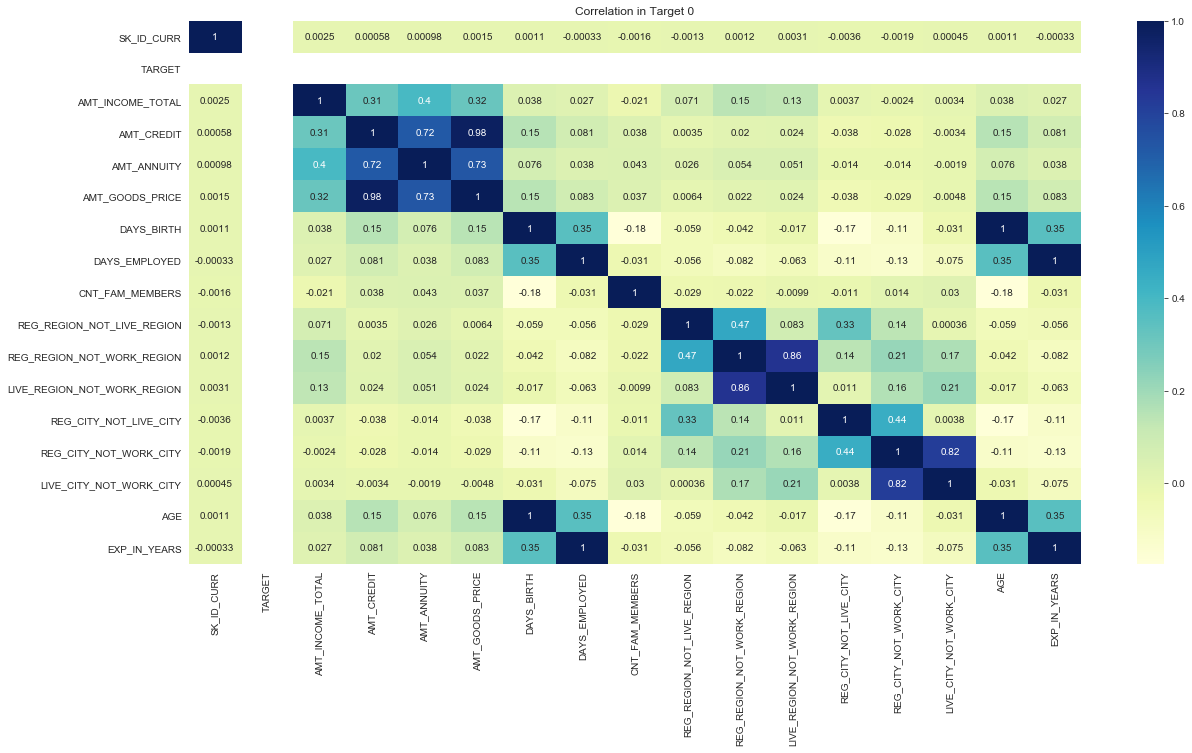

In [180]:
target0_corr = target0_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(target0_corr, cmap="YlGnBu", annot=True)
plt.title('Correlation in Target 0')
plt.show()

b. Top correlation in non-defaulter data:

1. AMT_GOOD_PRICE and AMT_CREDIT - 98%
2. LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION - 86%
3. LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY - 82%
4. AMT_ANNUITY and AMT_GOOD_PRICE - 73%